In [23]:
import cv2,os

data_path='true dataset'

In [24]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [25]:
categories=os.listdir(data_path)

In [26]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'Non-vedic dataset': 0, 'Vedic dataset': 1}
['Non-vedic dataset', 'Vedic dataset']
[0, 1]


In [27]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)
          

In [28]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [31]:
np.save('data',data)
np.save('target',new_target)

In [32]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [33]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [34]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [35]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/20
25/25 [==============================] - 25s 985ms/step - loss: 0.7541 - accuracy: 0.5373 - val_loss: 0.6466 - val_accuracy: 0.6513
Epoch 2/20
25/25 [==============================] - 24s 970ms/step - loss: 0.6246 - accuracy: 0.6645 - val_loss: 0.5754 - val_accuracy: 0.6564
Epoch 3/20
25/25 [==============================] - 25s 994ms/step - loss: 0.5471 - accuracy: 0.7301 - val_loss: 0.4741 - val_accuracy: 0.7795
Epoch 4/20
25/25 [==============================] - 25s 989ms/step - loss: 0.4785 - accuracy: 0.7661 - val_loss: 0.4712 - val_accuracy: 0.7846
Epoch 5/20
25/25 [==============================] - 25s 987ms/step - loss: 0.4979 - accuracy: 0.7609 - val_loss: 0.4436 - val_accuracy: 0.7897
Epoch 6/20
25/25 [==============================] - 24s 956ms/step - loss: 0.4037 - accuracy: 0.8265 - val_loss: 0.4779 - val_accuracy: 0.7897
Epoch 7/20
25/25 [==============================] - 24s 957ms/step - loss: 0.3570 - accuracy: 0.8458 - val_loss: 0.4526 - val_accuracy: 0.8103

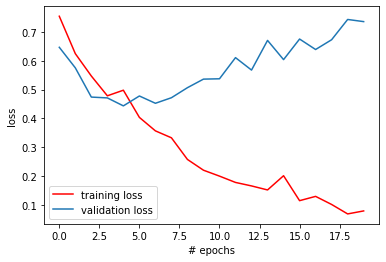

In [36]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



In [37]:
print(model.evaluate(test_data,test_target)) 

4/4 [==============================] - 1s 158ms/step - loss: 0.5345 - accuracy: 0.8349
[0.5344844460487366, 0.8348624110221863]
